## Задание
$(x-2)^2 2^x = 1$
- Решить уравнение методом простых итераций и методом Ньютона с точностью  $ε = 10^{-11}$
- Определить количество итераций для каждого метода


## Исходные данные

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

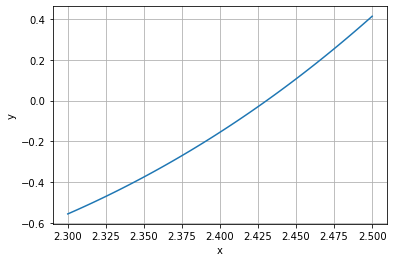

In [2]:
def function(x):
    return (x - 2)**2 * 2**x - 1
x = np.linspace(2.3, 2.5, 100)
y = [function(i) for i in x]
plt.xlabel("x")
plt.ylabel("y") 
plt.grid()      
plt.plot(x, y)

Область отделенного корня: $[ 2.3,  2.5 ]$

$ε = 10^{-11}$

## Краткая теория

### Метод Ньютона
$f(x) = 0$

$x^{*}\in [a,b]!\;$,    где $[a,b]$ – область отделенного корня и $f(x^{*}) = 0$

$x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}$

#### Теорема (сходимость метода Ньютона):
Если:
- $x^{*}\in [a,b]!\;\;\;$, $[a,b]$ – область отделенного корня
- $f(x) \in C^{(2)}[a,b],\;\; f'(x)≠0,\;\; f''(x)≠0\;\; ∀x\in [a,b]$
- $x_0 \in [a,b], \;\; f(x_0)*f''(x_0)>0$

тогда: $x_k\rightarrow x^*\;\; при\;\; k\rightarrow\infty$

#### Доказательство сходимости метода Ньютона: 
$[2.3,  2.5]$  является областью отделенного корня, т.к. :
- $f(2.3) < 0 , \;\;f(2.5) > 0$  
- $f'(x) > 0 ,\;\; при \;\;x\in[2.3,  2.5]$

$f'(x) = (2x-2) 2^x+(x-2)^2 2^x ln 2  > 0  при \;\;x\in[2.3,  2.5]$

$f''(x) = 2^{x+1}+(2x-2) 2^x ln 2+(x-2)^2 2^x ln^2 2 > 0  при \;\;x\in[2.3,  2.5]$

$x_0 = 2.5, f(2.5)*f''(2.5)>0$
#### Условие окончания итераций: $ |{x_k - x_{k - 1}}| < ε $

In [3]:
def derivative(x):
    return ((2 * x - 2) * 2**x) + ((x - 2)**2 * 2**x * np.log(2))

def double_derivative(x):
    return (((2 * x - 2) * 2**x * np.log(2)) + 2**(x + 1) + 
            ((2 * x - 2) * 2**x * np.log(2)) + 
            ((x - 2)**2 * 2**x * np.log(2)**2))

a,b = 2.3, 2.5
e = 10**(-11)

print('f({}) = {} < 0'.format(a, function(a)))
print('f({}) = {} > 0'.format(b, function(b)))

x0 = b
print('x0 = ', x0)

values = []
keys = []
k = 2
x1 = x0 - function(x0) / derivative(x0)
x2 = x1 - function(x1) / derivative(x1)
while np.abs(x2 - x1) > e :
    x1 = x2
    x2 = x2 - function(x2) / derivative(x2)
    if k < 5 or k % 5 == 0 :
        keys.append('$x_{{{}}} = $'.format(k))
        values.append(str(x1))
    k += 1
keys.append('$x_{{{}}} \thickapprox $'.format(k))
values.append(str(x1))

print('Количество итераций:   {}\nКорень:   {}'.format(k, x2))
df = pd.DataFrame(index=keys, data=values)
df

f(2.3) = -0.5567880111958308 < 0
f(2.5) = 0.41421356237309515 > 0
x0 =  2.5
Количество итераций:   55
Корень:   2.4306726661719087


,0
$x_{2} = $,2.4615529187772753
$x_{3} = $,2.4513013915382964
$x_{4} = $,2.444458827888345
$x_{5} = $,2.4398886426506605
$x_{10} = $,2.4319055171129538
$x_{15} = $,2.4308377496051143
$x_{20} = $,2.4306947744018603
$x_{25} = $,2.430675626980525
$x_{30} = $,2.4306730626815063
$x_{35} = $,2.430672719259424


### Метод простых итераций:
$f(x) = 0$

$x=φ(x)$

$φ(x)=x+cf(x),\;\;    f'(x)<1,\;\;   с - константа$

$x_0$ – начальное итерационное приближение

$x_k=φ(x_{k-1})$
#### Теорема (сходимость метода простых итераций)
Пусть $x_0$ – начальное итерационное приближение, которое выбирается так, что:
- $φ(x) \in C^{(1)}[a,b], \;\;S_0=[a,b]=\{x | |x-x_0|≤δ\} $
- $x^*=φ(x^*)∈[a,b]!$
- $q=|φ'(x)| <1$
- $x_1-x_0=φ(x_0)-x_0≤δ(1-q)$

тогда последовательность сходится, $x_k= φ(x_k)∈[a,b] \;\;$ и $\;\; x_k-x^*≤δq^k$

**Следствие**: $k(ε)=\left[\begin{array}{ccc}\frac{ln⁡(ε/δ)}{ln⁡(q)}\end{array}\right] +1$

#### Доказательство сходимости МПИ
$φ(x)= x - 0.1 f(x) = x + -0.1((x-2)^2 2^x - 1)$

$φ'(x)= 1 - 0.1 f'(x) = 1 - 0.1 ((2x-2) 2^x+(x-2)^2 2^x ln 2)$
- $φ(x) \in C^{(1)}[2.3, 2.5], \;\;S_0=[2.3, 2.5]=\{x | |x-2.4|≤δ\},\;\;δ=0.1 $
- $x^*=φ(x^*)∈[2.3, 2.5]!\;\;$(доказано ранее)
- $q=max|φ'(x)| <1, \;\;q=|φ'(2.5)|\thickapprox 0.7950820891945689$
- $|x_1-x_0|=|φ(x_0)-x_0|=|φ(2.4)-2.4|\thickapprox 0.015551493710534992 ≤ δ(1-q)\thickapprox 0.020491791080543127$

Следовательно МПИ сходится

$q > 0.5,\;$ поэтому условие окончания итераций:$\;\;q /(1-q)|x_{k}-x_{k-1}|<ε$

In [4]:
c = -0.1
def fi_function(x):
    return x + c * function(x)
def fi_derivative(x):
    return 1 + c * derivative(x)

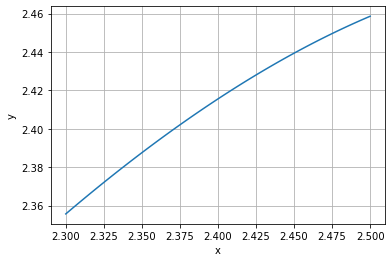

In [5]:
x_plt = np.linspace(3.5, 3,9, 100)
y_plt = [fi_function(i) for i in x_plt]
plt.xlabel("x")
plt.ylabel("y") 
plt.grid()      
plt.plot(x_plt, y_plt)

In [6]:
values = []
keys = []
delta = (b - a)/2
x1 = (a + b) / 2
x2 = fi_funcion(x1)
q = np.abs(fi_derivative(b))
k = 1
keys.append('$x_{{0}} = $')
values.append(str(x1))

NameError: name 'fi_funcion' is not defined

In [7]:
while np.abs(x2 - x1) * q / (1 - q) > e :
    x1 = x2
    x2 = fi_funcion(x1)
    if k % 5 == 0 or k < 4 :
        keys.append('$x_{{{}}} = $'.format(k))
        values.append(str(x1))
    k += 1
keys.append('$x_{{{}}} \thickapprox $'.format(k))
values.append(str(x2))

NameError: name 'q' is not defined

In [8]:
df = pd.DataFrame(index=keys, data=values)
print('delta =', delta)
print('q =', q)
print('Количество итераций:   {}\nКорень:   {}'.format(k, x2))
print('Априорная оценка:', int(np.log(e/delta)/np.log(q))+1)
df

delta = 0.10000000000000009


NameError: name 'q' is not defined